In [1]:
import pandas as pd
import pandas_ta as ta

In [2]:
df = pd.read_json('query2.json')

In [3]:

import json
f =  open('query2.json')
f=json.load(f)


open = []
high=[]
low=[]
close=[]
volume=[]
for i in df['TimeSeries']:
    open.append(i['1. open'])
    high.append(i['2. high'])
    low.append(i['3. low'])
    close.append(i['4. close'])
    volume.append(i['5. volume'])

d={
    "TimeStamp": f['TimeSeries'].keys(),
    "open": open,
   "high": high,
   "low": low,
   "close": close,
   "volume": volume,

   }

data = pd.DataFrame(data=d)

In [4]:
data

,TimeStamp,open,high,low,close,volume
0,2022-09-30 19:45:00,121.5900,121.5900,121.5100,121.5900,1071
1,2022-09-30 17:30:00,121.5900,121.6100,121.5900,121.6100,1502
2,2022-09-30 17:10:00,122.0100,122.0100,122.0100,122.0100,1010
3,2022-09-30 17:00:00,121.8800,121.8800,121.8800,121.8800,596
4,2022-09-30 16:55:00,121.9900,121.9900,121.9900,121.9900,123
...,...,...,...,...,...,...
95,2022-09-29 20:00:00,118.9700,118.9700,118.9700,118.9700,408
96,2022-09-29 19:30:00,118.8600,118.8600,118.8500,118.8500,1278
97,2022-09-29 19:05:00,119.0000,119.0000,119.0000,119.0000,430
98,2022-09-29 18:20:00,119.0500,119.0500,119.0500,119.0500,225


In [5]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
data['open'] = data['open'].astype(float)
data['high'] = data['high'].astype(float)
data['low'] = data['low'].astype(float)
data['close'] = data['close'].astype(float)
data['volume'] = data['volume'].astype(float)

In [6]:
ta.supertrend(high=data['high'], low=data['low'], close=data['close'], period=7,multiplier=3)

,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0
0,0.000000,1,NaN,NaN
1,NaN,1,NaN,NaN
2,NaN,1,NaN,NaN
3,NaN,1,NaN,NaN
4,NaN,1,NaN,NaN
...,...,...,...,...
95,119.437032,-1,NaN,119.437032
96,119.375126,-1,NaN,119.375126
97,119.375126,-1,NaN,119.375126
98,119.375126,-1,NaN,119.375126


In [7]:
data['sup'] = ta.supertrend(high=data['high'], low=data['low'], close=data['close'], period=7,multiplier=3)['SUPERT_7_3.0']

In [8]:
data.head()

,TimeStamp,open,high,low,close,volume,sup
0,2022-09-30 19:45:00,121.59,121.59,121.51,121.59,1071.0,0.0
1,2022-09-30 17:30:00,121.59,121.61,121.59,121.61,1502.0,NaN
2,2022-09-30 17:10:00,122.01,122.01,122.01,122.01,1010.0,NaN
3,2022-09-30 17:00:00,121.88,121.88,121.88,121.88,596.0,NaN
4,2022-09-30 16:55:00,121.99,121.99,121.99,121.99,123.0,NaN


In [9]:
data['BuySignal'] = 0
data['SellSignal'] = 0

In [10]:
data

,TimeStamp,open,high,low,close,volume,sup,BuySignal,SellSignal
0,2022-09-30 19:45:00,121.59,121.59,121.51,121.59,1071.0,0.000000,0,0
1,2022-09-30 17:30:00,121.59,121.61,121.59,121.61,1502.0,NaN,0,0
2,2022-09-30 17:10:00,122.01,122.01,122.01,122.01,1010.0,NaN,0,0
3,2022-09-30 17:00:00,121.88,121.88,121.88,121.88,596.0,NaN,0,0
4,2022-09-30 16:55:00,121.99,121.99,121.99,121.99,123.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...
95,2022-09-29 20:00:00,118.97,118.97,118.97,118.97,408.0,119.437032,0,0
96,2022-09-29 19:30:00,118.86,118.86,118.85,118.85,1278.0,119.375126,0,0
97,2022-09-29 19:05:00,119.00,119.00,119.00,119.00,430.0,119.375126,0,0
98,2022-09-29 18:20:00,119.05,119.05,119.05,119.05,225.0,119.375126,0,0


In [11]:
n=7
for i in range(n,len(data)):
    if data['close'][i-1]<=data['sup'][i-1] and data['close'][i]>data['sup'][i]:
        data['BuySignal'][i] = 1

    if data['close'][i-1]>=data['sup'][i-1] and data['close'][i]<data['sup'][i]:
        data['BuySignal'][i] = 1

C:\Users\alway\AppData\Local\Temp/ipykernel_10676/2806244265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BuySignal'][i] = 1


In [12]:
data

,TimeStamp,open,high,low,close,volume,sup,BuySignal,SellSignal
0,2022-09-30 19:45:00,121.59,121.59,121.51,121.59,1071.0,0.000000,0,0
1,2022-09-30 17:30:00,121.59,121.61,121.59,121.61,1502.0,NaN,0,0
2,2022-09-30 17:10:00,122.01,122.01,122.01,122.01,1010.0,NaN,0,0
3,2022-09-30 17:00:00,121.88,121.88,121.88,121.88,596.0,NaN,0,0
4,2022-09-30 16:55:00,121.99,121.99,121.99,121.99,123.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...
95,2022-09-29 20:00:00,118.97,118.97,118.97,118.97,408.0,119.437032,0,0
96,2022-09-29 19:30:00,118.86,118.86,118.85,118.85,1278.0,119.375126,0,0
97,2022-09-29 19:05:00,119.00,119.00,119.00,119.00,430.0,119.375126,0,0
98,2022-09-29 18:20:00,119.05,119.05,119.05,119.05,225.0,119.375126,0,0


In [13]:
data[(data['BuySignal']>0)|(data['SellSignal']>0)]

,TimeStamp,open,high,low,close,volume,sup,BuySignal,SellSignal
37,2022-09-30 13:55:00,121.085,121.16,120.98,120.995,33525.0,121.759753,1,0


In [14]:
data= data.set_index('TimeStamp')

In [15]:
data

,open,high,low,close,volume,sup,BuySignal,SellSignal
TimeStamp,,,,,,,,
2022-09-30 19:45:00,121.59,121.59,121.51,121.59,1071.0,0.000000,0,0
2022-09-30 17:30:00,121.59,121.61,121.59,121.61,1502.0,NaN,0,0
2022-09-30 17:10:00,122.01,122.01,122.01,122.01,1010.0,NaN,0,0
2022-09-30 17:00:00,121.88,121.88,121.88,121.88,596.0,NaN,0,0
2022-09-30 16:55:00,121.99,121.99,121.99,121.99,123.0,NaN,0,0
...,...,...,...,...,...,...,...,...
2022-09-29 20:00:00,118.97,118.97,118.97,118.97,408.0,119.437032,0,0
2022-09-29 19:30:00,118.86,118.86,118.85,118.85,1278.0,119.375126,0,0
2022-09-29 19:05:00,119.00,119.00,119.00,119.00,430.0,119.375126,0,0


In [16]:
import mplfinance as mpf

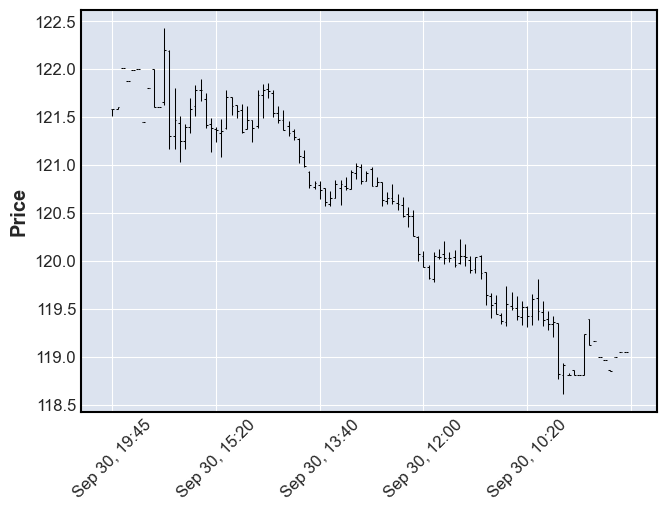

In [17]:
mpf.plot(data)

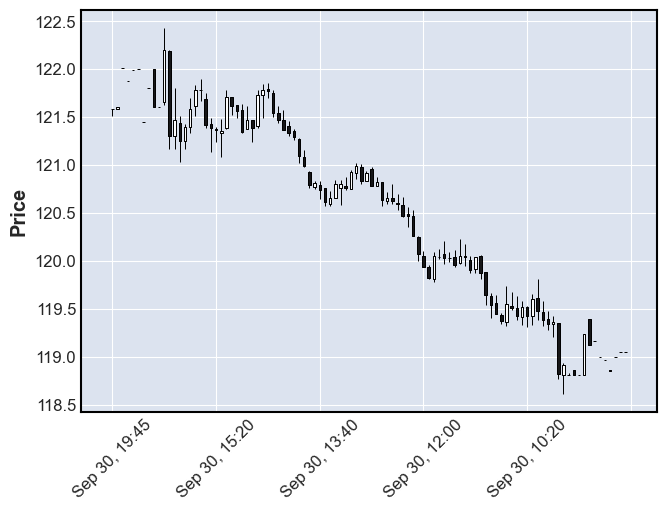

In [18]:
mpf.plot(data, type="candle")